In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix,precision_recall_fscore_support,recall_score
from sklearn.preprocessing import StandardScaler
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eval = pd.read_csv('training.csv')
train = pd.read_csv('eval.csv')
print('titanic dataset')
train.head()

titanic dataset


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [3]:
feature_names = ['sex','age','n_siblings_spouses','parch','fare','class','alone']
training_features = train[feature_names]
outcome_feature = ['survived']
outcome_label = train[outcome_feature]
categorical_features = ['sex','n_siblings_spouses','parch','class','alone']
numeric_features = ['age','fare']
print('training features')
training_features.head()

training features


,sex,age,n_siblings_spouses,parch,fare,class,alone
0,male,35.0,0,0,8.0500,Third,y
1,male,54.0,0,0,51.8625,First,y
2,female,58.0,0,0,26.5500,First,y
3,female,55.0,0,0,16.0000,Second,y
4,male,34.0,0,0,13.0000,Second,y


In [4]:
ss = StandardScaler()
ss.fit(training_features[numeric_features])
training_features[numeric_features] = ss.transform(training_features[numeric_features])
print('fitted_training features:')
training_features

<ipython-input-4-84de2d3665e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features[numeric_features] = ss.transform(training_features[numeric_features])
/home/prince_tesla/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


fitted_training features:


,sex,age,n_siblings_spouses,parch,fare,class,alone
0,male,0.444353,0,0,-0.543558,Third,y
1,male,1.788943,0,0,0.711569,First,y
2,female,2.072015,0,0,-0.013576,First,y
3,female,1.859711,0,0,-0.315809,Second,y
4,male,0.373585,0,0,-0.401752,Second,y
...,...,...,...,...,...,...,...
259,female,-0.263326,0,1,-0.029332,Second,n
260,male,0.302817,0,0,-0.547976,Third,y
261,female,0.727424,0,5,0.060192,Third,n
262,male,-0.121790,0,0,-0.401752,Second,y


In [5]:
training_features = pd.get_dummies(training_features,columns=categorical_features)
training_features.head()

,age,fare,sex_female,sex_male,n_siblings_spouses_0,n_siblings_spouses_1,n_siblings_spouses_2,n_siblings_spouses_3,n_siblings_spouses_4,n_siblings_spouses_5,...,parch_2,parch_3,parch_4,parch_5,parch_6,class_First,class_Second,class_Third,alone_n,alone_y
0,0.444353,-0.543558,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1.788943,0.711569,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2.072015,-0.013576,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1.859711,-0.315809,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.373585,-0.401752,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [6]:
engineering_features = list(set(training_features.columns) - set(numeric_features))
print('engineering features:')
engineering_features

engineering features:


['parch_0',
 'class_Second',
 'sex_female',
 'parch_5',
 'class_Third',
 'n_siblings_spouses_3',
 'parch_3',
 'parch_2',
 'class_First',
 'n_siblings_spouses_2',
 'alone_n',
 'parch_6',
 'n_siblings_spouses_8',
 'parch_4',
 'n_siblings_spouses_1',
 'parch_1',
 'n_siblings_spouses_0',
 'n_siblings_spouses_4',
 'alone_y',
 'n_siblings_spouses_5',
 'sex_male']

In [7]:
lr = LogisticRegression()
model = lr.fit(training_features,np.array(outcome_label['survived']))
model

LogisticRegression()

In [8]:
predicted_label  = model.predict(training_features)
actual_label = np.array(outcome_label['survived'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('classification report:\n',classification_report(actual_label,predicted_label))
print('confusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('precison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
def specificity(y_true , y_pred):
    w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
    return(x[0])
print('sensitivity score:\n',recall_score(actual_label,predicted_label))
print('specificity score:\n',specificity(actual_label,predicted_label))
len(actual_label)

accuracy score: 0.803030303030303
classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       165
           1       0.78      0.66      0.71        99

    accuracy                           0.80       264
   macro avg       0.80      0.77      0.78       264
weighted avg       0.80      0.80      0.80       264

confusion matrix:
 [[147  18]
 [ 34  65]]
precison,recall,fscore,support ARRAYS:
 (array([0.8121547 , 0.78313253]), array([0.89090909, 0.65656566]), array([0.84971098, 0.71428571]), array([165,  99]))
sensitivity score:
 0.6565656565656566
specificity score:
 0.8909090909090909


264

[0.98979592 0.9939759 ]


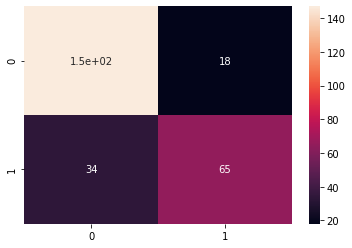

In [11]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(training_features,np.array(outcome_label['survived']))
actual_label_dt = np.array(outcome_label['survived'])
predicted_label_dt = model_dt.predict(training_features)
print(f1_score(actual_label_dt,predicted_label_dt,labels=(1,0),average=None))
cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

In [12]:
import sklearn
import joblib
import os 
# save models to be deployed on your server
if not os.path.exists('Model'):
     os.mkdir('Model')
if not os.path.exists('Scaler'):
     os.mkdir('Scaler')
        
joblib.dump(model, r'Model/model.pickle')
joblib.dump(ss, r'Scaler/scaler.pickle')

['Scaler/scaler.pickle']

In [13]:
#LOADING.............
model = joblib.load(r'Model/model.pickle')
scaler = joblib.load(r'Scaler/scaler.pickle')

In [14]:
feature_names = ['sex','age','n_siblings_spouses','parch','fare','class','alone']
prediction_features = eval[feature_names]
outcome_feature = ['survived']
outcome_label = eval[outcome_feature]
categorical_features = ['sex','n_siblings_spouses','parch','class','alone']
numeric_features = ['age','fare']
prediction_features.head()

,sex,age,n_siblings_spouses,parch,fare,class,alone
0,male,22.0,1,0,7.2500,Third,n
1,female,38.0,1,0,71.2833,First,n
2,female,26.0,0,0,7.9250,Third,y
3,female,35.0,1,0,53.1000,First,n
4,male,28.0,0,0,8.4583,Third,y


In [15]:
ss.fit(prediction_features[numeric_features])
prediction_features[numeric_features] = ss.transform(prediction_features[numeric_features])
prediction_features = pd.get_dummies(prediction_features,columns=categorical_features)
c_engineering_features = list(set(prediction_features.columns)-set(numeric_features))

<ipython-input-15-5aebcb85c9cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_features[numeric_features] = ss.transform(prediction_features[numeric_features])
/home/prince_tesla/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [16]:
#setting aside and making up for the whole categorical features from our first model
c_engineering_features = set(prediction_features.columns) - set(numeric_features)
missing_features = list(set(engineering_features) - c_engineering_features)
for feature in missing_features:
    #add zeroes
    prediction_features[feature] = [0]*len(prediction_features)
print('missing feature(s):',missing_features)    
prediction_features.head()

missing feature(s): ['parch_6']


,age,fare,sex_female,sex_male,n_siblings_spouses_0,n_siblings_spouses_1,n_siblings_spouses_2,n_siblings_spouses_3,n_siblings_spouses_4,n_siblings_spouses_5,...,parch_2,parch_3,parch_4,parch_5,class_First,class_Second,class_Third,alone_n,alone_y,parch_6
0,-0.610415,-0.497403,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.669397,0.676353,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,-0.290462,-0.485030,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.429432,0.343046,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.130485,-0.475254,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [17]:
prediction = model.predict(prediction_features)
eval['survived'] = prediction
eval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,0,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,0,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [18]:
from sklearn.metrics import f1_score
print(f1_score(actual_label,predicted_label,labels=(1,0),average= None))

[0.71428571 0.84971098]


In [19]:
outcome_label[outcome_label==1].count()

survived    243
dtype: int64

In [20]:
prediction_dt = model_dt.predict(prediction_features)
eval['survived'] = prediction_dt
eval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,0,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,0,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
